In [1]:
# Gerekli Kütüphaneler
# Yazar : Gökhan Şişman
# gokhansisman97@gmail.com
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils import shuffle
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

#Verilerin yüklenmesi

trainX = pd.read_table('X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('y_test.txt',delim_whitespace=True,header=None)

siniflar = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING"}


In [2]:
#Standart Skor Normalizasyonu
ortalama_trainX = trainX.mean(axis=0)
ortalama_testX = testX.mean(axis=0)
stdv_trainX = trainX.std(axis = 0)
stdv_testX = testX.std(axis = 0)

X_train = (trainX - ortalama_trainX)/stdv_trainX   #Normalize edilmiş Train(Eğitim) verisi
X_test = (testX - ortalama_testX)/stdv_testX  #Normalize edilmiş Test verisi
y_train = trainy              #Eğitim verisi
y_test = testy               #Test Verisi
y = np.array(y_train).ravel() #2 boyutu tek boyuta indirger. Ravel fonksiyonu : Tek bir dizi döndürür.


Eğitim setinin Karar ağacın da doğruluğu : 0.9351196953210011
Test setinin Karar ağacın da doğruluğu: 0.828978622327791


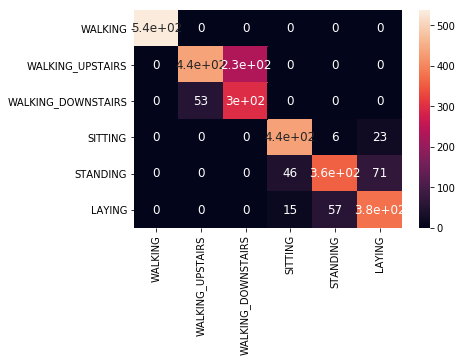

In [3]:
#Karar Ağaçları

rank_classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
rank_classifier.fit(X_train,y)
Predictions_test = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)
TrainAccuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)
TestAccuracy = accuracy_score(y_true = y_test, y_pred = Predictions_test)

print("Eğitim setinin Karar ağacın da doğruluğu : {}".format(TrainAccuracy))
print("Test setinin Karar ağacın da doğruluğu: {}".format(TestAccuracy))

yy = list(map(str, Predictions_test))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(siniflar))
y_test1 = np.array(pd.Series(yy1).map(siniflar))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))#df_cm - confusion matriksimiz. heatmap içine parametre verilecek.
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS",
                                                                 "WALKING_DOWNSTAIRS","SITTING",
                                                                 "STANDING","LAYING"), 
           xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()


0.8791991856124872
[0.87919919]
0.8741092636579573
[0.87919919 0.87410926]
0.8910756701730573
[0.87919919 0.87410926 0.89107567]
0.8856464200882254
[0.87919919 0.87410926 0.89107567 0.88564642]
0.8958262639972854
[0.87919919 0.87410926 0.89107567 0.88564642 0.89582626]
0.8914149983033594
[0.87919919 0.87410926 0.89107567 0.88564642 0.89582626 0.891415  ]
0.8965049202578894
[0.87919919 0.87410926 0.89107567 0.88564642 0.89582626 0.891415
 0.89650492]


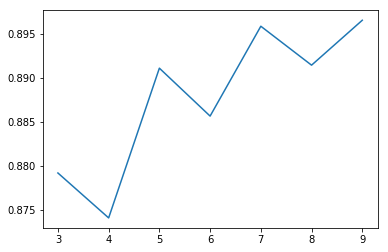

K için Optimum Değer  9
K için doğruluk(Accuracy) 0.8965049202578894


In [4]:
# KNN Uygulanması
from sklearn import neighbors # Gerekli değişken
Accuracy_KNN = np.array([])
rangeli = list(range(3,10))
for i in rangeli:                            
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y)
    predicted_knn = knn.predict(X_test)
    Accuracy = accuracy_score(y_true = y_test, y_pred = predicted_knn)
    Accuracy_KNN = np.append(Accuracy_KNN, Accuracy)
    print(Accuracy)
    print(Accuracy_KNN)

plt.plot(rangeli, Accuracy_KNN)
plt.show()
print("K için Optimum Değer  {}".format(rangeli[np.argmax(Accuracy_KNN)]))
print("K için doğruluk(Accuracy) {}".format(np.max(Accuracy_KNN)))

Gaussian Naive Bayes'in eğitim seti doğruluğu :  0.7461915125136017
Gaussian Naive Bayes'in test seti doğruluğu : 0.5721072276891754


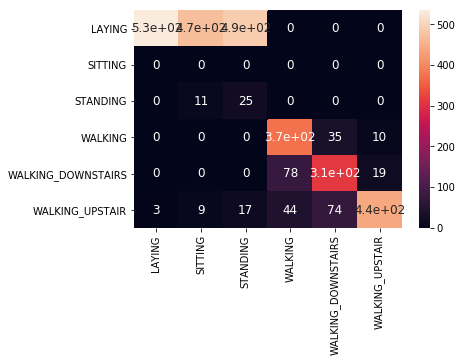

In [5]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_modeli = GaussianNB()               #Modelin Yüklenmesi
naive_bayes_modeli.fit(X_train, y)              
predicted_mnb = naive_bayes_modeli.predict(X_test)
predicted_train = naive_bayes_modeli.predict(X_train)
#Accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
Accuracy_test = accuracy_score(y_true = y_test, y_pred = predicted_mnb)
Accuracy_train = accuracy_score(y_true = y_train, y_pred = predicted_train)
print("Gaussian Naive Bayes'in eğitim seti doğruluğu :  {}".format(Accuracy_train))
print("Gaussian Naive Bayes'in test seti doğruluğu : {}".format(Accuracy_test))

yy = list(map(str, predicted_mnb))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(siniflar))
y_test1 = np.array(pd.Series(yy1).map(siniflar))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("LAYING", "SITTING","STANDING",
                                                                 "WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"),
           xticklabels=("LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"))# font size
plt.show()

In [6]:
df_cm # Confusion Matrisi 

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIR
LAYING,534,471,490,0,0,0
SITTING,0,0,0,0,0,0
STANDING,0,11,25,0,0,0
WALKING,0,0,0,374,35,10
WALKING_DOWNSTAIRS,0,0,0,78,311,19
WALKING_UPSTAIR,3,9,17,44,74,442
